# 3D Surface

Jalankan file ini di Openquake yang sudah diinstal di komputer masing-masing.

atau:

Jalankan file ini di jupyter dengan cara mengubah kernel ke `openquake`. Jika kernel `openquake` belum ada, lakukan langkah-langkah berikut ini:

Openquake dapat diunduh di sini:
https://downloads.openquake.org/pkgs/windows/oq-engine/OpenQuake_Engine_3.11.5-1.exe

Install beberapa tambahan packages di openquake:

(Asumsi lokasi instalasi openquake di sini: `C:\Program Files\Openquake Engine\python3.6\`, 
jika tidak maka ubah lokasi tersebut sesuai dengan komputer masing-masing)

1. Buka Command Prompt
2. Install `jupyter`: `"C:\Program Files\Openquake Engine\python3.6\python.exe" -m pip install jupyter`
3. Daftarkan ke dalam kernel (opsional): `"C:\Program Files\Openquake Engine\python3.6\python.exe" -m ipykernel install --name "openquake" --display-name "openquake"`


Untuk uji coba, jalankan salah satu baris di bawah ini:

`"C:\Program Files\Openquake Engine\python3.6\Scripts\jupyter.exe" notebook`

atau

`"C:\Program Files\Openquake Engine\python3.6\Scripts\jupyter-notebook.exe"`

## 1. Import packages

Hal ini memastikan apakah python yang digunakan sudah menyediakan packages yang dibutuhkan.

In [5]:
from custom_openquake import *
from openquake.hazardlib.geo.surface.simple_fault import SimpleFaultSurface

# folder penyimpanan
dir_figs = os.path.join(os.getcwd(), 'figs')
os.makedirs(dir_figs, exist_ok=True)

## 3. Menghitung ...

In [6]:
geom = ([100,101],[-3,-4])
line = LineOQ([PointOQ(lon, lat) for lon, lat in zip(*geom)])

In [7]:
fault_surface = SimpleFaultSurface.from_fault_data(line, upper_seismogenic_depth=0, lower_seismogenic_depth=20, 
                                                       dip=30, mesh_spacing=1)

In [10]:
cell_center, cell_length, cell_width, cell_area = fault_surface.mesh.get_cell_dimensions()

In [21]:
points, along_azimuth, updip, diag = fault_surface.mesh.triangulate()

In [29]:
fault_surface.mesh.lons.shape

(41, 158)

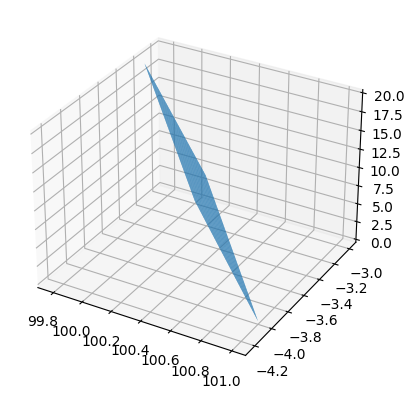

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(fault_surface.mesh.lons, fault_surface.mesh.lats, fault_surface.mesh.depths)

In [32]:
a = LineString([[0, 0], [1, 0], [1, 1]])

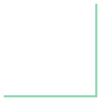

In [39]:
LineString(list(a.coords)[::-1])